# Analysis of lever-centered firing fields and their relationship to search and homing paths

If the lever-centered firing fields are stabalized by path integraiton, their quality should vary as a function of the search path.

If homing partly depends on the activity of hippocampal neurons, then homing accuracy should be related to lever centered firing fields. 

The search variables and homing error is calculated with the notebook `extract_trials.ipynb`

We can get the homing error for each trialElectro in the variables 

* trial.homingAngleAtPeriphery: Angle between a vector [1,0] (from center of arena going East) and a vector from the center of arena going to the location where the animal reached periphery
* trial.homingAngleAtPeripheryLever: Angle between a vector from the lever to the bridge and a vector from the lever to the location where the animal reached periphery

We could create intervals for accurate and inaccurate trials


In [1]:
%load_ext autoreload
%autoreload 2

%run ~/repo/autopi_analysis_bk/Jazi_et.al_2023_noInt/setup_project.py
%run ~/repo/autopi_analysis_bk/Jazi_et.al_2023_noInt/neuronAutopi.py

prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1
Reading /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:19<00:00,  2.05it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject) # load analyzed trials
prepareSessionsForSpatialAnalysisProject(sSesList,myProjectWithTrials.sessionList,pose_file_extension = ".pose_kf.npy")

Loading: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/myProjectWithTrials.pickle
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:23<00:00,  1.65it/s]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict
CPU times: user 15.4 s, sys: 9.03 s, total: 24.4 s
Wall time: 46.9 s


In [ ]:
del myProject

In [3]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getSearchHomingIntervals(ses,sSes)

39it [00:00, 55.19it/s]


## Characterize homing error during light and dark trials for our recording sessions

In [4]:
i=34
ses = myProjectWithTrials.sessionList[i]
sSes = sSesList[i]

-1.5707963267948966


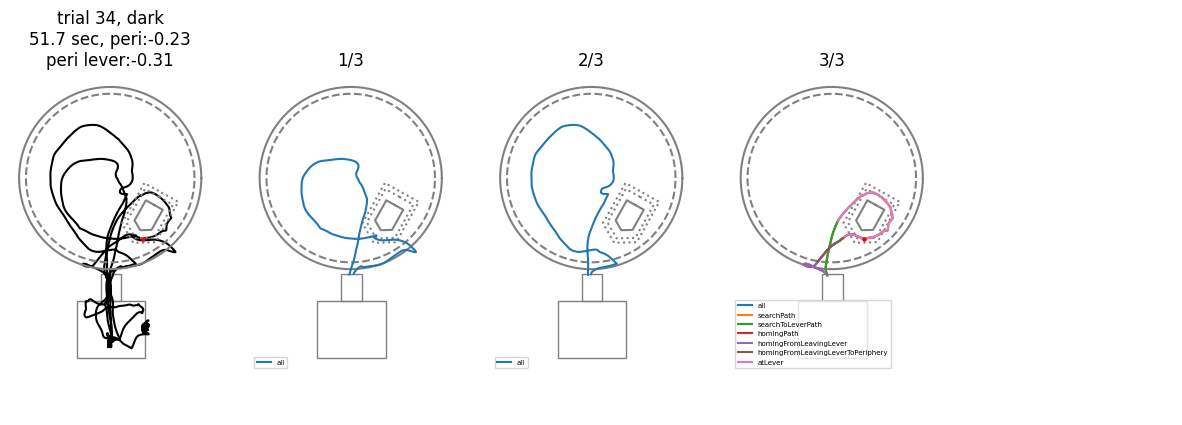

In [5]:
t = ses.trialList[33]
fig,ax = plt.subplots(1,5,figsize=(15,5))
t.plotTrialAndJourneys(ax)
print(-np.pi/2)

In [6]:
fn = ses.path+"/navPathSummary.csv"
navs = pd.read_csv(fn)
navs

,name,trial,trialNo,journey,type,light,nLeverPresses,startTimeRos,endTimeRos,startTimeRes,endTimeRes
0,mn9686-26102021-0106_1-0_all,mn9686-26102021-0106_1,1,0,all,light,0,1.635264e+09,1.635264e+09,3045.52,3049.84
1,mn9686-26102021-0106_1-1_all,mn9686-26102021-0106_1,1,1,all,light,1,1.635264e+09,1.635264e+09,3058.06,3061.54
2,mn9686-26102021-0106_1-1_searchPath,mn9686-26102021-0106_1,1,1,searchPath,light,1,1.635264e+09,1.635264e+09,3058.06,3059.22
3,mn9686-26102021-0106_1-1_searchToLeverPath,mn9686-26102021-0106_1,1,1,searchToLeverPath,light,1,1.635264e+09,1.635264e+09,3058.06,3058.60
4,mn9686-26102021-0106_1-1_homingPath,mn9686-26102021-0106_1,1,1,homingPath,light,1,1.635264e+09,1.635264e+09,3059.24,3061.54
...,...,...,...,...,...,...,...,...,...,...,...
1000,mn9686-26102021-0106_125-0_searchToLeverPath,mn9686-26102021-0106_125,125,0,searchToLeverPath,light,1,1.635269e+09,1.635269e+09,8283.42,8284.02
1001,mn9686-26102021-0106_125-0_homingPath,mn9686-26102021-0106_125,125,0,homingPath,light,1,1.635269e+09,1.635269e+09,8285.02,8286.66
1002,mn9686-26102021-0106_125-0_homingFromLeavingLever,mn9686-26102021-0106_125,125,0,homingFromLeavingLever,light,1,1.635269e+09,1.635269e+09,8285.90,8286.66
1003,mn9686-26102021-0106_125-0_homingFromLeavingLe...,mn9686-26102021-0106_125,125,0,homingFromLeavingLeverToPeriphery,light,1,1.635269e+09,1.635269e+09,8285.90,8286.58


## Get homing error for trials in this dataset

We can get a DataFrame with data from every trial in the dataset.

In [7]:
res = pd.concat([ ses.getTrialVariablesDataFrame() for ses in myProjectWithTrials.sessionList])

In [8]:
res.columns

Index(['sessionName', 'name', 'valid', 'trialNo', 'startTime', 'endTime',
       'startTimeWS', 'endTimeWS', 'duration', 'light', 'arenaRadiusCm',
       'nLeverPresses', 'nJourneys', 'searchLength', 'searchDuration',
       'searchMeanSpeed', 'searchMedianMVDeviationToTarget',
       'searchLastTargetToAnimalAngle', 'homingAngleAtPeriphery',
       'homingErrorAtPeriphery', 'homingErrorAtPeripheryLever',
       'homingErrorAtPeripheryLeverAbsolute', 'leverX', 'leverY', 'subject',
       'date'],
      dtype='object')

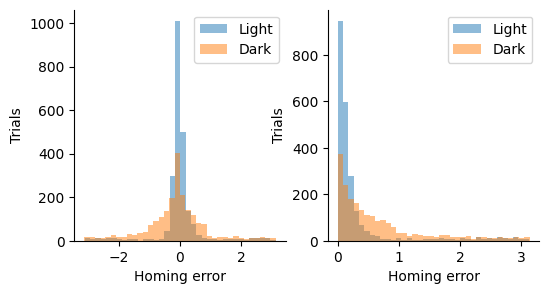

In [9]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
for i,light in enumerate(["light","dark"]):
    ax[0].hist(res.homingErrorAtPeriphery[res.light==light],bins=36,label=light.capitalize(),alpha=0.5)
ax[0].set_xlabel("Homing error")
ax[0].set_ylabel("Trials")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()

for i,light in enumerate(["light","dark"]):
    r = ax[1].hist(np.abs(res.homingErrorAtPeriphery[res.light==light]),bins=36,label=light.capitalize(),alpha=0.5)
ax[1].set_xlabel("Homing error")
ax[1].set_ylabel("Trials")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()

plt.show()

## Trial intervals

We create intervals for dark trials with and without accurate homing. We can then compare the activity between these two types of trials.

* We have the recStartTime and resEndTime in ses.trial.
* We have the homing error in ses.getTrialVariablesDataFrame()


In [10]:
ses = myProjectWithTrials.sessionList[1]
getAccurateHomingIntervals(ses)

In [11]:
ses = myProjectWithTrials.sessionList[1]
getShortSearchIntervals(ses)

In [12]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getAccurateHomingIntervals(ses)


39it [00:06,  5.99it/s]


In [13]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getShortSearchIntervals(ses)

39it [00:05,  6.62it/s]


## Create trial matrix

We need a firing rate x angle from lever to animal for each trial. This will be used to relate homing error angle and the angle at which the cell fired.

We should get this for all dark trials with a lever presses


In [14]:
i=14
ses = myProjectWithTrials.sessionList[i]
sSes = sSesList[i]
ses.name

'mn2739-17022021-0106'

In [15]:
ses.getTrialVariablesDataFrame()

,sessionName,name,valid,trialNo,startTime,endTime,startTimeWS,endTimeWS,duration,light,...,searchMedianMVDeviationToTarget,searchLastTargetToAnimalAngle,homingAngleAtPeriphery,homingErrorAtPeriphery,homingErrorAtPeripheryLever,homingErrorAtPeripheryLeverAbsolute,leverX,leverY,subject,date
0,mn2739-17022021-0106,mn2739-17022021-0106_1,True,1,1.613583e+09,1.613583e+09,3.229151,51.711319,48.482168,light,...,9.812926,-1.489434,-1.815495,-0.277862,-0.276630,0.276630,1.596429,0.319079,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_2,True,2,1.613583e+09,1.613583e+09,59.712318,72.242178,12.529860,light,...,15.101390,-1.334181,-1.671902,-0.134269,-0.126831,0.126831,-1.502651,1.345834,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_3,True,3,1.613583e+09,1.613583e+09,87.255839,104.201783,16.945944,light,...,14.567530,-1.695343,-1.681986,-0.144352,-0.154607,0.154607,-1.094382,-3.015108,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_4,True,4,1.613583e+09,1.613583e+09,117.211290,168.008762,50.797472,light,...,19.439203,-1.204017,-1.738930,-0.201297,-0.194744,0.194744,0.172423,1.320032,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_5,True,5,1.613583e+09,1.613583e+09,193.636715,214.981432,21.344717,light,...,8.323947,-1.447480,-1.819007,-0.281374,-0.392093,0.392093,-0.310328,-10.876039,mn2739,2021-02-17 01:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,mn2739-17022021-0106,mn2739-17022021-0106_130,True,130,1.613587e+09,1.613587e+09,4364.080346,4384.949573,20.869227,dark,...,85.961055,-0.140983,-1.616273,-0.078639,-0.101969,0.101969,12.793084,-2.905288,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_131,True,131,1.613587e+09,1.613587e+09,4392.950005,4405.352445,12.402440,light,...,25.143454,-1.767768,-1.632844,-0.095211,-0.135680,0.135680,-2.550341,-13.666973,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_132,True,132,1.613587e+09,1.613587e+09,4413.357062,4431.853203,18.496141,dark,...,46.231921,0.091911,-2.053959,-0.516326,-0.454205,0.454205,-13.623745,1.071908,mn2739,2021-02-17 01:06:00
0,mn2739-17022021-0106,mn2739-17022021-0106_133,True,133,1.613587e+09,1.613587e+09,4462.112919,4478.177753,16.064834,light,...,36.860090,-3.031672,-1.632080,-0.094447,-0.050744,0.050744,-6.092437,27.088209,mn2739,2021-02-17 01:06:00


In [16]:
ifr, navs, inav = load_ifr_behavior(ses)

In [17]:
navs.type.value_counts()

all                                  176
searchPath                           128
searchToLeverPath                    128
homingPath                           128
homingFromLeavingLever               128
homingFromLeavingLeverToPeriphery    128
atLever                              128
Name: type, dtype: int64

In [18]:
def journeyIFRMatrices(ses,sSes,navPathTypes=["all","atLever"],light = "dark",maxDistance=12): # I changed 30 to 12. We are now using a new distance from lever (distance from lever box wall instead of distance from lever center)
    """
    Function the get the IFR matrix of each neuron in a session
    
    """
    print(ses.name)
    
    # load raw data from file
    ifr, navs, inav = load_ifr_behavior(ses)
     

    # create a list of NeuronAutopi object
    naList=[]
    for i, n in enumerate(sSes.cg.neuron_list):
        neuronIndex=i
        cluId = sSes.name+"_"+n.spike_train.name
        na = NeuronAutopi(name = cluId, ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navs,iNavPath=inav,trialElectro=ses.trialList[0])
        naList.append(na)
   
    for i, na in enumerate(naList):
        for pathType in navPathTypes:
            na.navPathBehavioralMatrix_targetToAnimalAngle(navPathType=pathType,light=light,nLeverMin = 1,maxTargetDistance=maxDistance,bins=np.linspace(-np.pi,np.pi,20)) 
            
    sesRes={}
    for na in naList:
        sesRes[na.name] = na.navPathResultsDict
    
    return sesRes

In [19]:
ifr, navs, inav = load_ifr_behavior(ses)

In [20]:
neuronIndex=0
na = NeuronAutopi(name = "0", ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navs,iNavPath=inav,trialElectro=ses.trialList[0])

In [21]:
na.getNavPathNames("atLever","dark",1).shape,na.getNavPathNames("all","dark",1).shape

((62,), (63,))

In [22]:
myType="all"
navs[(navs.type==myType)&(navs.light=="dark")&(navs.nLeverPresses>0)]

,name,trial,trialNo,journey,type,light,nLeverPresses,startTimeRos,endTimeRos,startTimeRes,endTimeRes
52,mn2739-17022021-0106_8-1_all,mn2739-17022021-0106_8,8,1,all,dark,1,1.613583e+09,1.613583e+09,3337.50,3349.72
67,mn2739-17022021-0106_10-1_all,mn2739-17022021-0106_10,10,1,all,dark,1,1.613583e+09,1.613583e+09,3423.26,3434.18
81,mn2739-17022021-0106_14-0_all,mn2739-17022021-0106_14,14,0,all,dark,1,1.613583e+09,1.613583e+09,3511.48,3522.28
98,mn2739-17022021-0106_16-3_all,mn2739-17022021-0106_16,16,3,all,dark,1,1.613583e+09,1.613583e+09,3611.20,3623.82
112,mn2739-17022021-0106_18-0_all,mn2739-17022021-0106_18,18,0,all,dark,1,1.613584e+09,1.613584e+09,3671.96,3680.92
...,...,...,...,...,...,...,...,...,...,...,...
880,mn2739-17022021-0106_126-1_all,mn2739-17022021-0106_126,126,1,all,dark,1,1.613587e+09,1.613587e+09,7201.30,7216.16
895,mn2739-17022021-0106_128-1_all,mn2739-17022021-0106_128,128,1,all,dark,1,1.613587e+09,1.613587e+09,7266.62,7273.10
909,mn2739-17022021-0106_130-0_all,mn2739-17022021-0106_130,130,0,all,dark,2,1.613587e+09,1.613587e+09,7329.12,7344.94
923,mn2739-17022021-0106_132-0_all,mn2739-17022021-0106_132,132,0,all,dark,3,1.613587e+09,1.613587e+09,7381.32,7392.10


In [23]:
%%time
res = journeyIFRMatrices(ses,sSes)

mn2739-17022021-0106
CPU times: user 20.4 s, sys: 42.4 ms, total: 20.5 s
Wall time: 20.5 s


In [24]:
for k in res['mn2739-17022021-0106_0']['matrix'].keys():
    print(res['mn2739-17022021-0106_0']['matrix'][k]["matrix"].shape)
    print(res['mn2739-17022021-0106_0']['matrix'][k]["bins"])

(63, 19)
[-3.14159265 -2.81089869 -2.48020473 -2.14951076 -1.8188168  -1.48812284
 -1.15742887 -0.82673491 -0.49604095 -0.16534698  0.16534698  0.49604095
  0.82673491  1.15742887  1.48812284  1.8188168   2.14951076  2.48020473
  2.81089869  3.14159265]
(62, 19)
[-3.14159265 -2.81089869 -2.48020473 -2.14951076 -1.8188168  -1.48812284
 -1.15742887 -0.82673491 -0.49604095 -0.16534698  0.16534698  0.49604095
  0.82673491  1.15742887  1.48812284  1.8188168   2.14951076  2.48020473
  2.81089869  3.14159265]


In [25]:
%%time
res = [ journeyIFRMatrices(ses,sSes) for ses,sSes in zip(myProjectWithTrials.sessionList[:],sSesList[:])]

mn5824-20112020-0107
mn5824-22112020-0107
mn5824-24112020-0107
mn5824-02122020-0106
mn711-28012021-0106
mn711-30012021-0106
mn711-31012021-0107
mn711-01022021-0107
mn711-02022021-0108
mn711-03022021-0107
mn711-04022021-0107
mn2739-11022021-0107
mn2739-15022021-0105
mn2739-16022021-0106
mn2739-17022021-0106
mn2739-21022021-0106
mn3246-09042021-0106
mn3246-10042021-0106
mn3246-12042021-0106
mn3246-14042021-0106
mn1173-02052021-0107
mn1173-06052021-0107
mn1173-08052021-0107
mn1173-09052021-0108
mn1173-11052021-0108
TYY9524-16082021-0106
TYY9524-18082021-0106
mn5618-07072021-0107
mn5618-12072021-0110
TYY5622-07092021-0106
TYY5622-17092021-0106
TYY5622-19092021-0106
TYY5622-20092021-0106
mn9686-20102021-0106
mn9686-26102021-0106
mn9686-27102021-0106
mn9686-28102021-0107
mn9686-29102021-0106
mn9686-01112021-0106
CPU times: user 22min 52s, sys: 3.23 s, total: 22min 55s
Wall time: 23min 6s


In [26]:
newRes={}
for d in res:
    newRes.update(d)
print("Number of neurons: {}".format(len(newRes)))

Number of neurons: 1080


In [27]:
fn=myProjectWithTrials.dataPath+"/results/aroundLeverIFRDict.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(newRes, handle)

saving: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/aroundLeverIFRDict.pickle


In [28]:
fn=myProjectWithTrials.dataPath+"/results/aroundLeverIFRDict.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    res1 = pickle.load(handle)
len(res1.keys())

loading: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/aroundLeverIFRDict.pickle


1080

## Lever maps for accurate and innacurate trials

Having intervals for trials with accurate and inaccurate trials, we can then create maps around the lever for both types of trials.

The code below was largely taken from `lever_centered_maps.ipynb`. Ideally we would not have 2 copies of the same functions.

In [29]:
def distanceToLeverBox(ses,sSes,maxDistance=12): # we use 12 as it is where the increase in the occupancy data falls 
    """
    Get the distance fo the animal from the lever box, set value above maxDistance to np.nan
    
    Get the walls of the lever box to get distance
    """

    fn = sSes.path+"/leverBoxDistance.npy"
    
    if os.path.exists(fn):
        #print(fn,"exists")
        D = np.load(fn)
    else:
        print(fn,"does not exist, generating data")
        res = ses.getDistanceFromLever()
        dDf = pd.DataFrame({"resTime":sSes.ap.pose[:,0]})
        d1Df = pd.DataFrame({"resTime":res[:,0],
                       "distance":res[:,1]})
        df = pd.merge(dDf,d1Df,on="resTime",how="left")
        D =  df.distance.to_numpy()
        print("saving",fn)
        np.save(fn,D)
    
    D[D>maxDistance] = np.nan
    return D

def vectorAngle(v,rv=np.array([[1,0]]),degrees=False,quadrant=False) :
        """
    
        Calculate the angles between an array of vectors relative to a reference vector
        Argument:
            v: Array of vectors, one vector per row
            rv: Reference vector
            degrees: Boolean indicating whether to return the value as radians (False) or degrees (True)
            quadrant: Adjust the angle for 3 and 4 quadrants, assume rv is (1,0) and the dimension of v is 2.
        Return:
            Array of angles, between -pi/2 and p/2
        """
        # length of vector
        if v.shape[1]!=rv.shape[1]:
            print("v and rv should have the same number of column")
            return
        vLen = np.sqrt(np.sum(v*v,axis=1))
        vLen[vLen==0] = np.NAN
        rvLen = np.sqrt(np.sum(rv*rv,axis=1))

        # get unitary vectors
        uv = v/vLen[:,None]
        urv = rv/rvLen[:,None]

        # get the angle, dot product, then acos
        theta = np.arccos(np.clip(np.sum(uv*urv,axis=1),  -1.0, 1.0))

        if quadrant:
            # deal with the 3 and 4 quadrant
            theta[v[:,-1] < 0] = 2*np.pi - theta[v[:,-1]<0] 

        if degrees :
            theta = theta * 360 / (2*np.pi)
        
        return theta
    

def getLeverMaps(ses,sSes,interName="light",sizeMap=30,maxDistanceFromLeverBox=12, rotationType="none",
                 invalidateSmallBridgeAngle=False,invalidateMaxAngle=np.pi/12,
                 rateType="map",stats=False):
    """
    Get all the lever-centered firing rate maps or firing rate polar plots around the lever. The data can be plotted in different reference coordinate system.
    The lever position is set to 0,0.
    The orientation is either unchanged ("none") or relative to the vector going from the lever to the bridge ("bridge") or relative to the lever orientation ("lever")
    
    It can create normal 2D maps or a firing rate histogram with the firing rate as a function of the direction of a vector with its origin at the lever and poinint towards the animal.
    
    Arguments
    ses: autopipy session
    sSes: spikeA session
    interName: name of intervals to use (from ses.intervalDict)
    maxDistance: max distance from lever
    rotationType: can be "none","bridge","lever", once centered on the lever,
                    we can rotate the position to have different reference frame (cartesian (none), relative to bridge direction, relative to lever orientation)
    invalidateSmallBridgeAngle: whether to invalidate lever position when the bridge angle is small (for which cartesian and brdige reference frames are the same)
                                This is done to eliminate data when the none and brdige rotations are the same
                                This can be used to better contrast the prediction of "bridge" and "none" rotation
    invalidateMaxAngle: angle below which we invalidate
    rateType: (map) firing rate maps or (angular) angular rate histogram
    stats: whether to return the statistics instead of the map.
    
    """
   
    # change the x and y position of the mouse so that it is relative to the lever position
    #print(ses.name)
    
    sSes.ap.load_pose_from_file() # get original hd data, which file depends on what we used when calling prepareSessionsForSpatialAnalysis
    
    # we need to calculate the distance from the lever box and eliminate when the animal is further away than about 12 cm 
    D = distanceToLeverBox(ses,sSes,maxDistance=maxDistanceFromLeverBox) # what is further away is np.nan in D
    sSes.ap.pose[np.isnan(D),1:3] = np.nan 
      
    
    # transform the coordinate system of the position data, in setup_project.py
    # x and y are relative to lever center (0,0), hd is the direction of the position vector (x,y) relative to 1,0
    # the values are changed in sSes.ap.pose_ori[:,1:3]
    toLeverReferenceFrame(ses=ses,sSes=sSes,maxDistance=sizeMap, rotationType=rotationType, # maxDistance not important here because we already filtered. Should be the size of the map
                         invalidateSmallBridgeAngle=invalidateSmallBridgeAngle,invalidateMaxAngle=invalidateMaxAngle) 

    sSes.ap.set_intervals(ses.intervalDict[interName])

    if rateType=="map": # normal 2D maps
        for n in sSes.cg.neuron_list:
            n.spike_train.set_intervals(ses.intervalDict[interName])
            n.spatial_properties.firing_rate_map_2d(cm_per_bin =1, smoothing_sigma_cm = 2, smoothing=True,xy_range = np.array([[-sizeMap,-sizeMap],[sizeMap,sizeMap]]) )
        mapList = [ n.spatial_properties.firing_rate_map for n in sSes.cg.neuron_list ]
        mapStack = np.stack(mapList, axis=0)
    elif rateType=="angular" :# angular 1D maps
        for n in sSes.cg.neuron_list:
            n.spike_train.set_intervals(ses.intervalDict[interName])
            n.spatial_properties.firing_rate_head_direction_histogram(deg_per_bin=10, smoothing_sigma_deg=10, smoothing=True)
        if stats == False:
            mapList = [ n.spatial_properties.firing_rate_head_direction_histo for n in sSes.cg.neuron_list ]
            mapStack = np.stack(mapList, axis=0)
        else:
            mapList = [ np.array(n.spatial_properties.head_direction_score()) for n in sSes.cg.neuron_list ]
            mapStack = np.stack(mapList, axis=0)
    else:
        print("rateType not supported")
    
    sSes.ap.load_pose_from_file() # get original position data
    
    return mapStack 

In [30]:
rateType="map"
rotType="none"
sSes = sSesList[-1]
ses = myProjectWithTrials.sessionList[-1]
ses.intervalDict.keys()

dict_keys(['circ80', 'circ80_1', 'circ80_2', 'task', 'task_1', 'task_2', 'light', 'light_1', 'light_2', 'dark', 'dark_1', 'dark_2', 'searchPath_light', 'searchPath_light_1', 'searchPath_light_2', 'searchPath_dark', 'searchPath_dark_1', 'searchPath_dark_2', 'searchToLeverPath_light', 'searchToLeverPath_light_1', 'searchToLeverPath_light_2', 'searchToLeverPath_dark', 'searchToLeverPath_dark_1', 'searchToLeverPath_dark_2', 'homingPath_light', 'homingPath_light_1', 'homingPath_light_2', 'homingPath_dark', 'homingPath_dark_1', 'homingPath_dark_2', 'homingFromLeavingLever_light', 'homingFromLeavingLever_light_1', 'homingFromLeavingLever_light_2', 'homingFromLeavingLever_dark', 'homingFromLeavingLever_dark_1', 'homingFromLeavingLever_dark_2', 'homingFromLeavingLeverToPeriphery_light', 'homingFromLeavingLeverToPeriphery_light_1', 'homingFromLeavingLeverToPeriphery_light_2', 'homingFromLeavingLeverToPeriphery_dark', 'homingFromLeavingLeverToPeriphery_dark_1', 'homingFromLeavingLeverToPeriphery_

In [31]:
res = {}
stats = {}
for intName in ['dark_accurateHoming', 'dark_inaccurateHoming']:
    res = getLeverMaps(ses,sSes,interName="all_light",
                  rotationType = rotType, invalidateSmallBridgeAngle=False, rateType=rateType,stats=False)
    stats = getLeverMaps(ses,sSes,interName="all_light",
                  rotationType = rotType, invalidateSmallBridgeAngle=False, rateType=rateType,stats=True)

In [32]:
res.shape

(57, 60, 60)

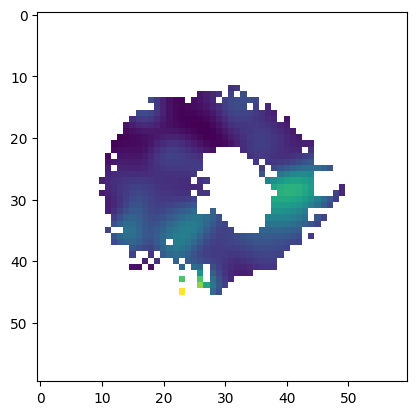

In [33]:
plt.imshow(res[5])

In [34]:
conditions = ['dark_accurateHoming', 'dark_inaccurateHoming',"dark","dark_1",]
keys = conditions

In [35]:
%%time
myLeverMaps = {}
for rateType in ["map","angular"]:
    myLeverMaps[rateType]={}
    for key,cond in zip(keys,conditions):
        myLeverMaps[rateType][key] = {}
        for rotType in ["none"]:
            print(rateType,key,rotType)
            myLeverMaps[rateType][key][rotType] = np.concatenate([getLeverMaps(ses,sSes,cond,
                                                                     rotationType = rotType, 
                                                                     invalidateSmallBridgeAngle=False, rateType=rateType,
                                                                     stats=False) for ses,sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList))]) 

map dark_accurateHoming none


39it [01:08,  1.75s/it]


map dark_inaccurateHoming none


39it [01:00,  1.54s/it]


map dark none


39it [01:29,  2.30s/it]


map dark_1 none


39it [01:01,  1.58s/it]


angular dark_accurateHoming none


39it [00:58,  1.50s/it]


angular dark_inaccurateHoming none


39it [00:59,  1.52s/it]


angular dark none


39it [01:19,  2.04s/it]


angular dark_1 none


39it [00:59,  1.52s/it]

CPU times: user 8min 24s, sys: 22.7 s, total: 8min 47s
Wall time: 8min 56s


In [36]:
fn=myProjectWithTrials.dataPath+"/results/myLeverMapsAccurate.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(myLeverMaps, handle)

saving: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/myLeverMapsAccurate.pickle


Stats for polar data

In [37]:
%%time
myLeverMapsStats = {}
for rateType in ["angular"]:
    myLeverMapsStats[rateType]={}
    for key,cond in zip(keys,conditions):
        myLeverMapsStats[rateType][key] = {}
        for rotType in ["none"]:
            print(rateType,key,rotType)
            myLeverMapsStats[rateType][key][rotType] = np.concatenate([getLeverMaps(ses,sSes,cond,
                                                                            rotationType = rotType, 
                                                                            invalidateSmallBridgeAngle=False, rateType=rateType,
                                                                             stats=True) for ses,sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList))])

angular dark_accurateHoming none


39it [00:56,  1.45s/it]


angular dark_inaccurateHoming none


39it [00:57,  1.47s/it]


angular dark none


39it [01:22,  2.12s/it]


angular dark_1 none


39it [01:01,  1.57s/it]

CPU times: user 4min 7s, sys: 10.1 s, total: 4min 17s
Wall time: 4min 17s


In [38]:
fn=myProjectWithTrials.dataPath+"/results/myLeverMapsStatsAccurate.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(myLeverMapsStats, handle)

saving: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/myLeverMapsStatsAccurate.pickle


In [39]:
myLeverMapsStats["angular"]["dark_accurateHoming"]["none"].shape

(1080, 5)

## Create 2D lever-box-centered maps for short and long search length

In [40]:
conditions = ['dark_shortSearch', 'dark_longSearch']
keys = conditions

In [41]:
%%time
myLeverMaps = {}
for rateType in ["map"]:
    myLeverMaps[rateType]={}
    for key,cond in zip(keys,conditions):
        myLeverMaps[rateType][key] = {}
        for rotType in ["none"]:
            print(rateType,key,rotType)
            myLeverMaps[rateType][key][rotType] = np.concatenate([getLeverMaps(ses,sSes,cond,
                                                                     rotationType = rotType, 
                                                                     invalidateSmallBridgeAngle=False, rateType=rateType,
                                                                     stats=False) for ses,sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList))]) 

map dark_shortSearch none


39it [00:56,  1.46s/it]


map dark_longSearch none


39it [00:56,  1.46s/it]

CPU times: user 1min 49s, sys: 3.53 s, total: 1min 53s
Wall time: 1min 53s


In [42]:
fn=myProjectWithTrials.dataPath+"/results/myLeverMapsShortSearch.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(myLeverMaps, handle)

saving: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/myLeverMapsShortSearch.pickle


In [43]:
myLeverMaps["map"]["dark_shortSearch"]["none"].shape

(1080, 60, 60)

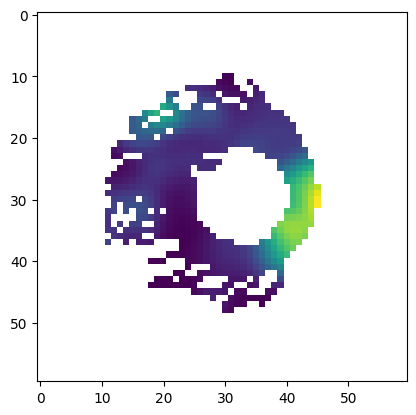

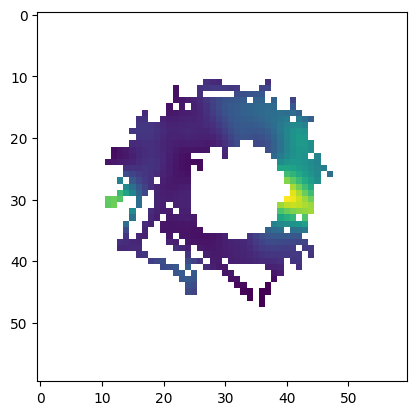

In [44]:
plt.imshow(myLeverMaps["map"]["dark_shortSearch"]["none"][100])
plt.show()
plt.imshow(myLeverMaps["map"]["dark_longSearch"]["none"][100])
plt.show()